# Practical Assignment: Binary Classification using Logistic Regression, Neural Networks, and Random Forest

### Problem Statement
In this assignment, you'll predict the presence of heart disease in patients using clinical data. This practical exercise involves real-world binary classification, employing techniques you've learned:
- Logistic Regression
- Neural Networks
- Random Forest

### Dataset Description
The dataset used is the [Heart Disease UCI dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease), which contains medical attributes such as age, cholesterol levels, blood pressure, and more.

The task is to predict whether a patient has heart disease (target = 1) or not (target = 0).

### Objectives
- Perform exploratory data analysis (EDA)
- Preprocess data effectively
- Train and evaluate models: Logistic Regression, Neural Networks, Random Forest
- Compare the performance of models using appropriate metrics


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


## Load the dataset

In [2]:
# Load the dataset
datapath = r"d:\UE\MACHINE LEARNING\PRACTICE ASSIGNMENT\heart.csv"
df = pd.read_csv(datapath)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [3]:
# Check data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
print(df.columns)
df["target"].value_counts()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


target
1    165
0    138
Name: count, dtype: int64

C:\Users\efede\AppData\Local\Temp\ipykernel_8024\725627156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette= "coolwarm")


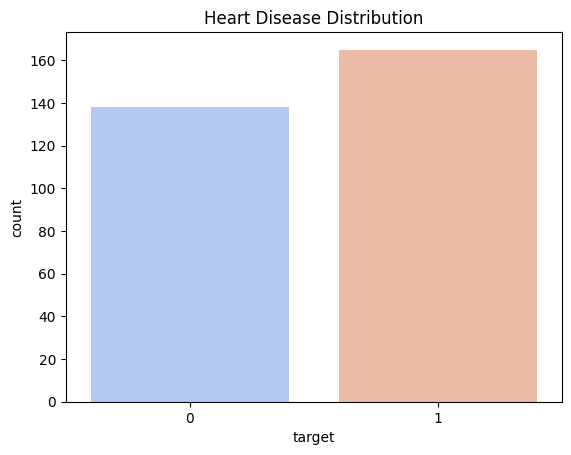

In [7]:
# Visualize class distribution
sns.countplot(x='target', data=df, palette= "coolwarm")   
plt.title('Heart Disease Distribution')
plt.show()


### Perform various visualization to understand the nature of data

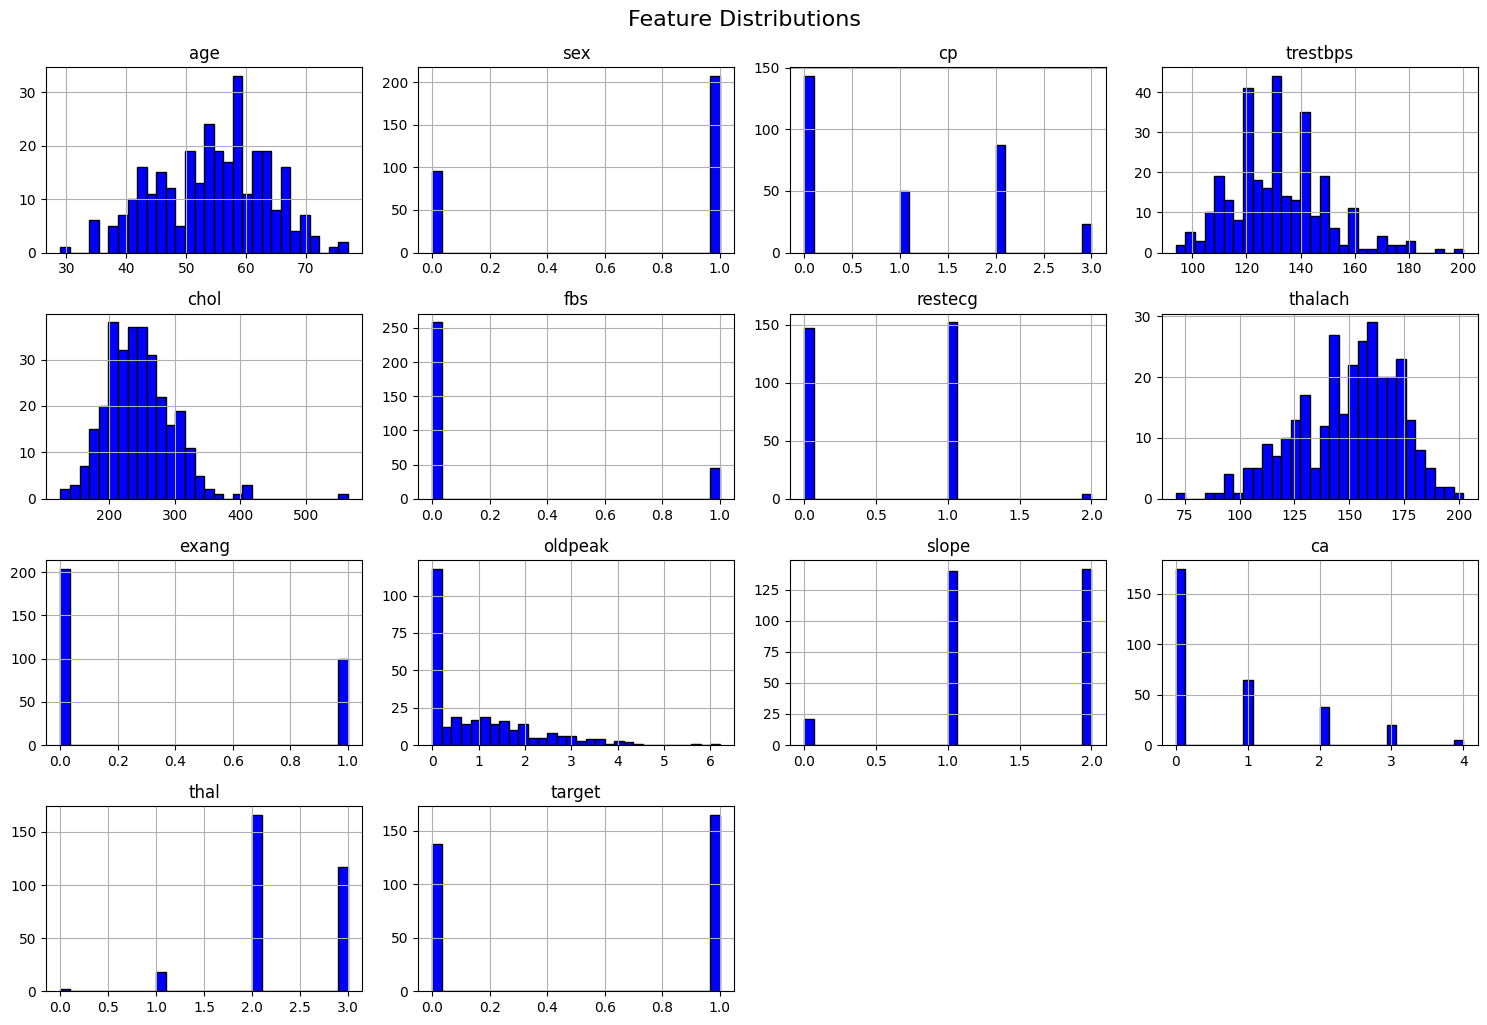

In [8]:
plt.style.use('default')
df.hist(figsize=(15, 10) , bins=30, color='blue' , edgecolor='black')
plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02, fontsize=16)
plt.show()

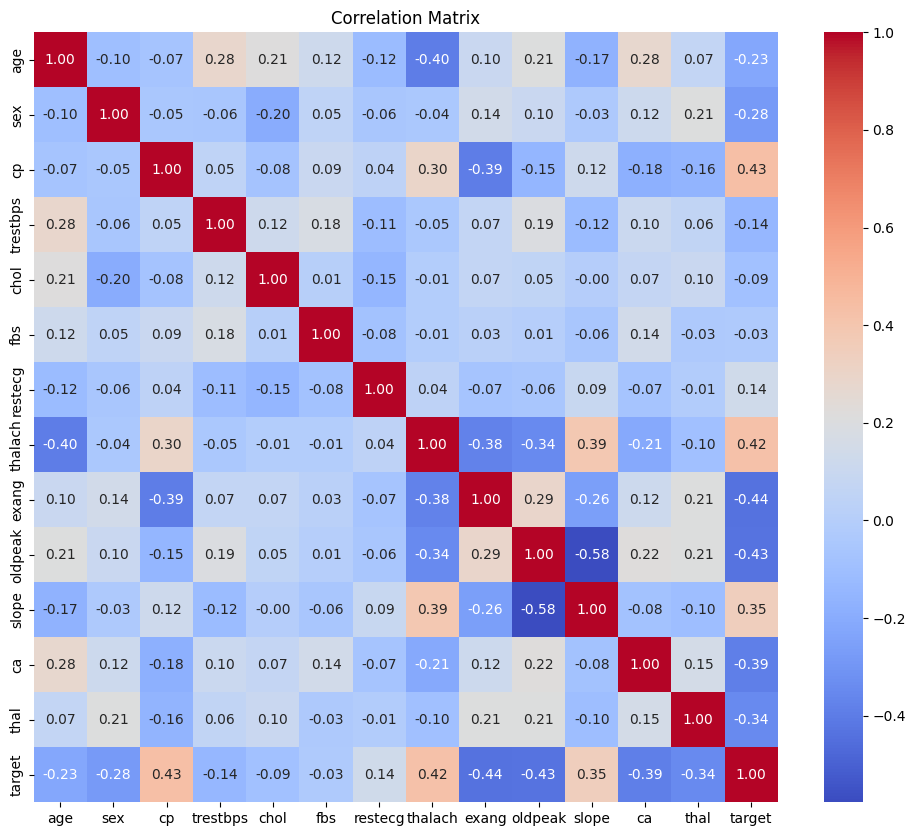

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' , fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


C:\Users\efede\AppData\Local\Temp\ipykernel_8024\2730908417.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='coolwarm')


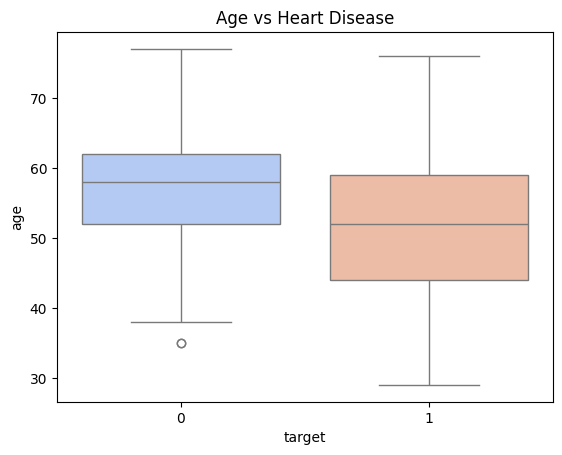

In [10]:
sns.boxplot(x='target', y='age', data=df, palette='coolwarm')
plt.title('Age vs Heart Disease')
plt.show()

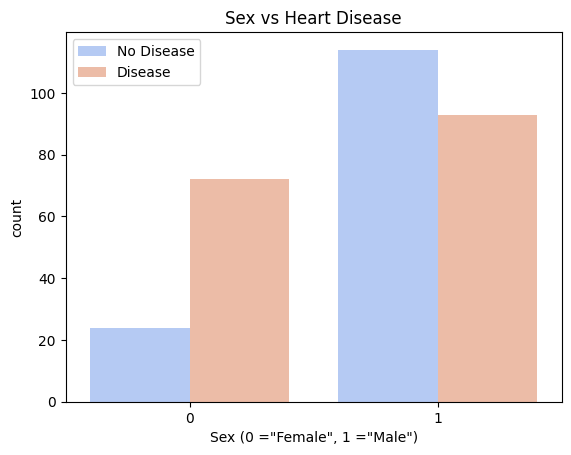

In [11]:
sns.countplot(x="sex" , hue= "target", data=df, palette="coolwarm")
plt.title('Sex vs Heart Disease')
plt.legend(['No Disease', 'Disease'])
plt.xlabel('Sex (0 ="Female", 1 ="Male")')
plt.show()

In [12]:
#empty list for further comparison
results = [] 

## Data Preprocessing

- Divide the data into Features and Target
- Perform Feature Scaling
- Divide the data into Training and Test Sets

In [13]:
X = df.drop("target", axis=1)
y=df["target"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8, stratify=y)
print(f"{X_train.shape}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")


(242, 13)
(61, 13)
(242,)
(61,)


In [15]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## Logistic Regression Model

- Initialize a Logistic Regression Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

In [16]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled , y_train)
print("Logistic Regression Model Trained")
print(log_reg_model.intercept_)
print(log_reg_model.coef_)

Logistic Regression Model Trained
[0.16118858]
[[-0.10259393 -0.89405568  0.76988459 -0.35412652 -0.25900787 -0.03455883
   0.27318784  0.41883783 -0.34675317 -0.61189333  0.38458296 -0.65305088
  -0.40808426]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
y_train_pred= log_reg_model.predict(X_train_scaled)

In [19]:
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Training Performance Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Training Performance Metrics:
Accuracy : 0.8512
Precision: 0.8288
Recall   : 0.9167
F1 Score : 0.8705


In [20]:
y_test_pred = log_reg_model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nTest Performance Metrics:")
print(f"Accuracy : {accuracy_test:.4f}") 
print(f"Precision: {precision_test:.4f}")
print(f"Recall   : {recall_test:.4f}")
print(f"F1 Score : {f1_test:.4f}")


Test Performance Metrics:
Accuracy : 0.8852
Precision: 0.8824
Recall   : 0.9091
F1 Score : 0.8955


In [21]:
results.append({
    'Model': 'Logistic Regression',
    'Test Accuracy': accuracy_test,
    'Test Precision': precision_test,
    'Test Recall': recall_test,
    'Test F1 Score': f1_test
})

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [23]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)

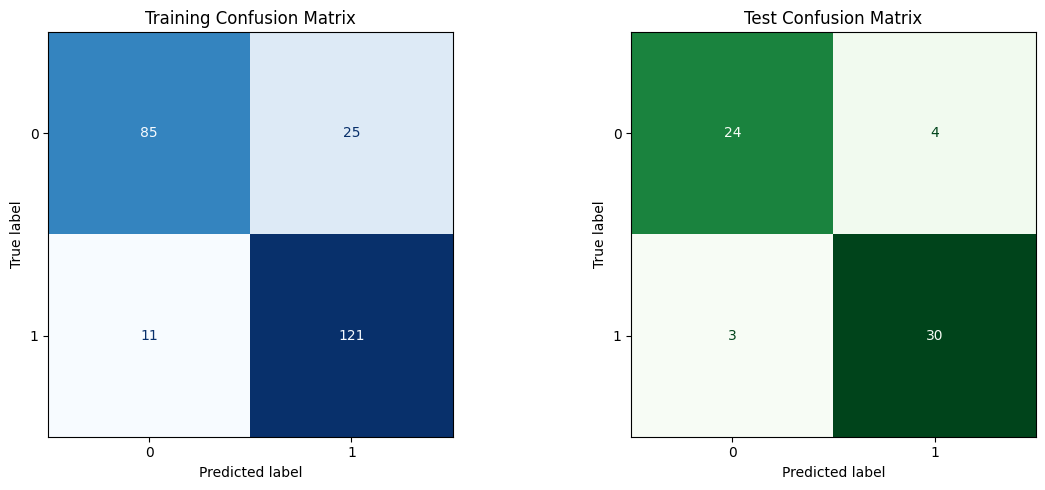

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Training Confusion Matrix
ConfusionMatrixDisplay(cm_train, display_labels=log_reg_model.classes_).plot(
    ax=axes[0], colorbar=False, cmap='Blues')
axes[0].set_title("Training Confusion Matrix")

# Test Confusion Matrix
ConfusionMatrixDisplay(cm_test, display_labels=log_reg_model.classes_).plot(
    ax=axes[1], colorbar=False, cmap='Greens')
axes[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

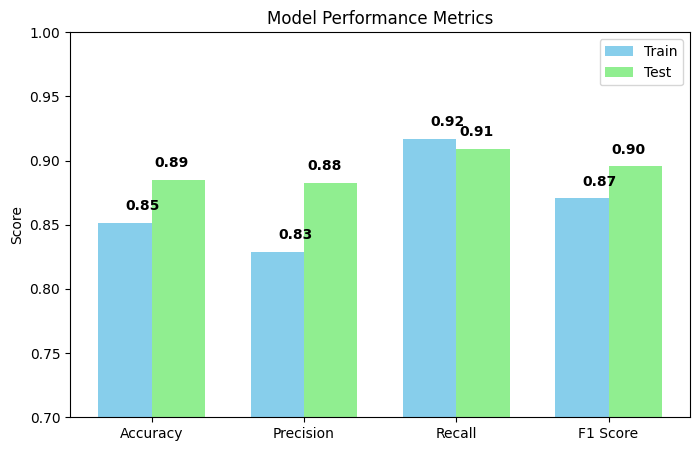

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [0.8512, 0.8288, 0.9167, 0.8705]
test_scores  = [0.8852, 0.8824, 0.9091, 0.8955]

# X-axis positions
x = np.arange(len(metrics))
width = 0.35  # bar width

# Create the figure

plt.figure(figsize=(8,5))
# Bars for training and test scores

plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='lightgreen')

# Axis labels and title
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.title('Model Performance Metrics')
plt.xticks(x, metrics)
plt.legend()

# Add score labels above bars
for i, v in enumerate(train_scores):
    plt.text(i - 0.17, v + 0.01, f"{v:.2f}", color='black', fontweight='bold')
for i, v in enumerate(test_scores):
    plt.text(i + 0.02, v + 0.01, f"{v:.2f}", color='black', fontweight='bold')

plt.show()


## Neural Network Model

- Design a Neural Network Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Plot the train and test accuracy after each epoch (Hint: Use History)
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

In [26]:
nn_model = Sequential([
    Dense(16, activation= "relu" , input_shape=(X_train_scaled.shape[1],)),
    Dense(15, activation= "relu" ),
    Dense(10, activation= "relu" ),
    Dense(1, activation= "sigmoid" )
           
])

nn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
nn_model.summary()

c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650 (2.54 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = nn_model.fit(X_train_scaled, y_train,epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4814 - loss: 0.6943 - val_accuracy: 0.5574 - val_loss: 0.6805
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6569 - loss: 0.6596 - val_accuracy: 0.6066 - val_loss: 0.6507
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6592 - loss: 0.6348 - val_accuracy: 0.6721 - val_loss: 0.6176
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6976 - loss: 0.6022 - val_accuracy: 0.7213 - val_loss: 0.5770
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7615 - loss: 0.5591 - val_accuracy: 0.7541 - val_loss: 0.5358
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7890 - loss: 0.5275 - val_accuracy: 0.8033 - val_loss: 0.4929
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7882 - loss: 0.5034 - val_accuracy: 0.8361 - val_loss: 0.4551
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8028 - loss: 0.4776 - val_accuracy: 0.8689 - val_loss

In [28]:
y_train_pred = (nn_model.predict(X_train_scaled) > 0.5).astype("int32")
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Performance Metrics:")
print(f"Accuracy : {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall   : {train_recall:.4f}")
print(f"F1 Score : {train_f1:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Training Performance Metrics:
Accuracy : 0.9174
Precision: 0.9242
Recall   : 0.9242
F1 Score : 0.9242


In [29]:
y_test_pred = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall= recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Performance Metrics:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}") 
print(f"F1 Score : {test_f1:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Test Performance Metrics:
Accuracy : 0.9180
Precision: 0.9375
Recall   : 0.9091
F1 Score : 0.9231


In [30]:
results.append({
    'Model': 'Neural Network',
    'Test Accuracy': test_accuracy,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1 Score': test_f1
})

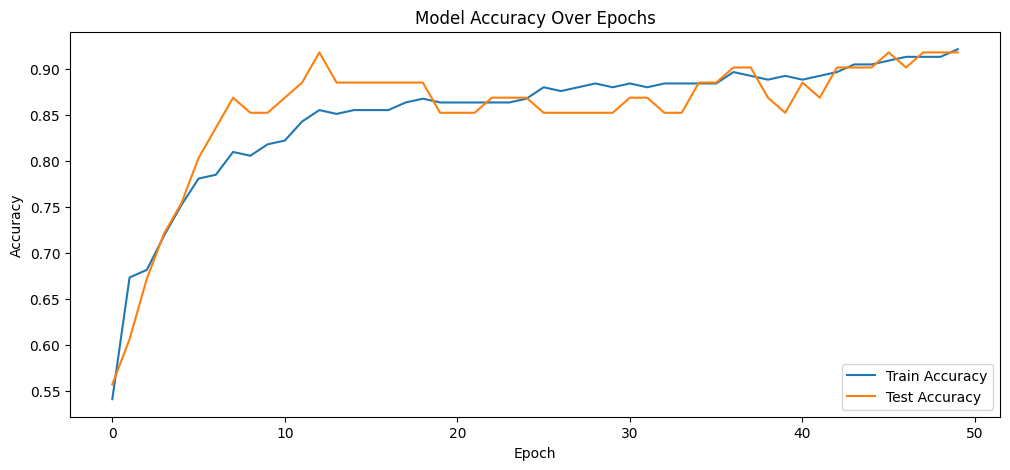

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.plot(history.history ["accuracy"], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [32]:
cm=confusion_matrix(y_train, y_train_pred)
cm= confusion_matrix(y_test, y_test_pred)


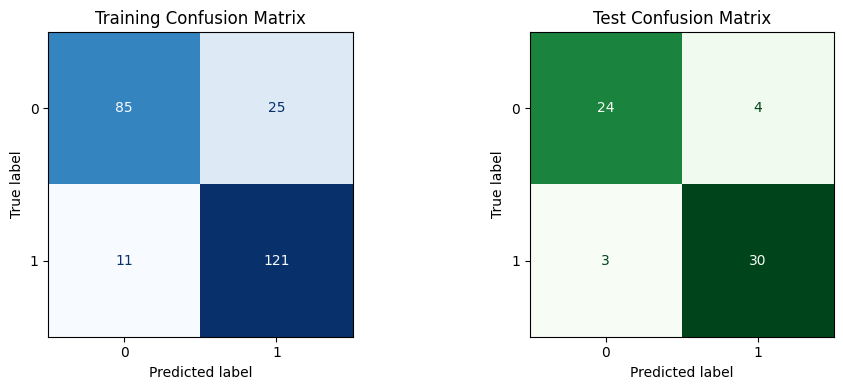

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Training confusion matrix
ConfusionMatrixDisplay(cm_train).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Training Confusion Matrix")

# Test confusion matrix
ConfusionMatrixDisplay(cm_test).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()


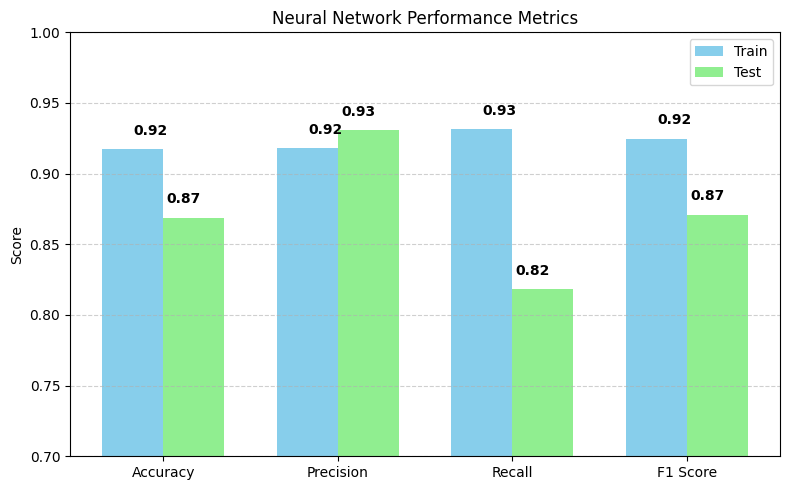

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [0.9174, 0.9179, 0.9318, 0.9248]
test_scores  = [0.8689, 0.9310, 0.8182, 0.8710]

# X positions
x = np.arange(len(metrics))
width = 0.35  # bar width

# Create the figure
plt.figure(figsize=(8,5))

# Bars for train and test
plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='lightgreen')

# Labels and title
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.title('Neural Network Performance Metrics')
plt.xticks(x, metrics)
plt.legend()

# Add numeric labels on top of bars
for i, v in enumerate(train_scores):
    plt.text(i - 0.17, v + 0.01, f"{v:.2f}", color='black', fontweight='bold')
for i, v in enumerate(test_scores):
    plt.text(i + 0.02, v + 0.01, f"{v:.2f}", color='black', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Random Forest Model

- Design a Random Forest Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Identify the most important features
- Train the model on top 5 features, does it perform better than the model trained with all the features?
- Add more cells as required.

In [35]:
rf_model = RandomForestClassifier(n_estimators= 100,random_state=8, verbose= 1)
rf_model.fit(X_train_scaled, y_train)
print("Random Forest Model Trained")

Random Forest Model Trained


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [36]:
y_train_pred= (rf_model.predict(X_train_scaled)>0.5).astype("int32")
y_test_pred= (rf_model.predict(X_test_scaled)>0.5).astype("int32")


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [37]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score (y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)


print("Training Performance Metrics:")
print(f"Accuracy : {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall   : {train_recall:.4f}")
print(f"F1 Score : {train_f1:.4f}")

Training Performance Metrics:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000


In [38]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score (y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Performance Metrics:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")


Test Performance Metrics:
Accuracy : 0.8689
Precision: 0.8788
Recall   : 0.8788
F1 Score : 0.8788


In [39]:
results.append({
    'Model': 'Random Forest',
    'Test Accuracy': test_accuracy,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1 Score': test_f1})

In [40]:
cm=confusion_matrix(y_train, y_train_pred)
cm=confusion_matrix(y_test, y_test_pred)

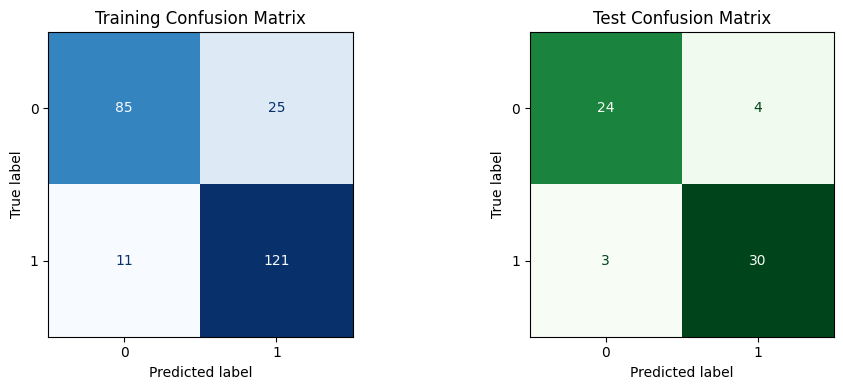

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Training confusion matrix
ConfusionMatrixDisplay(cm_train).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Training Confusion Matrix")

# Test confusion matrix
ConfusionMatrixDisplay(cm_test).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

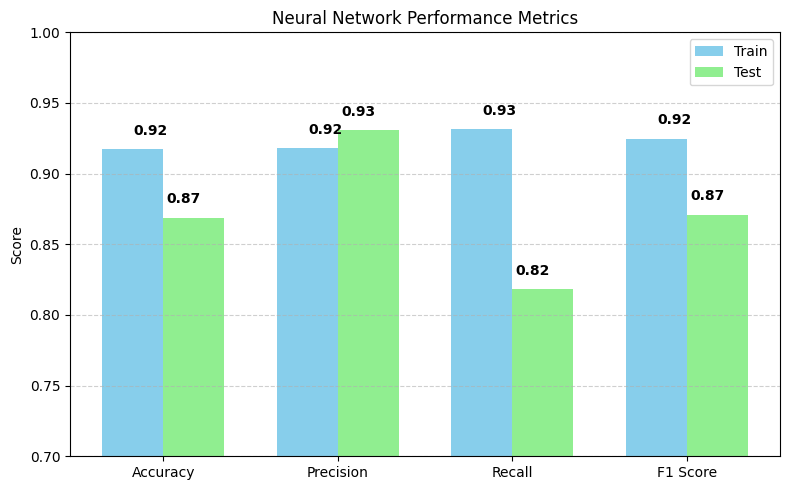

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [0.9174, 0.9179, 0.9318, 0.9248]
test_scores  = [0.8689, 0.9310, 0.8182, 0.8710]

# X positions
x = np.arange(len(metrics))
width = 0.35  # bar width

# Create the figure
plt.figure(figsize=(8,5))

# Bars for train and test
plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='lightgreen')

# Labels and title
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.title('Neural Network Performance Metrics')
plt.xticks(x, metrics)
plt.legend()

# Add numeric labels on top of bars
for i, v in enumerate(train_scores):
    plt.text(i - 0.17, v + 0.01, f"{v:.2f}", color='black', fontweight='bold')
for i, v in enumerate(test_scores):
    plt.text(i + 0.02, v + 0.01, f"{v:.2f}", color='black', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [43]:
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

     Feature  Importance
11        ca    0.129560
7    thalach    0.119757
9    oldpeak    0.115128
2         cp    0.112647
0        age    0.101120
12      thal    0.091943
3   trestbps    0.082397
4       chol    0.080193
8      exang    0.050047
10     slope    0.042723
1        sex    0.036038
6    restecg    0.026405
5        fbs    0.012043


C:\Users\efede\AppData\Local\Temp\ipykernel_8024\4111200446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


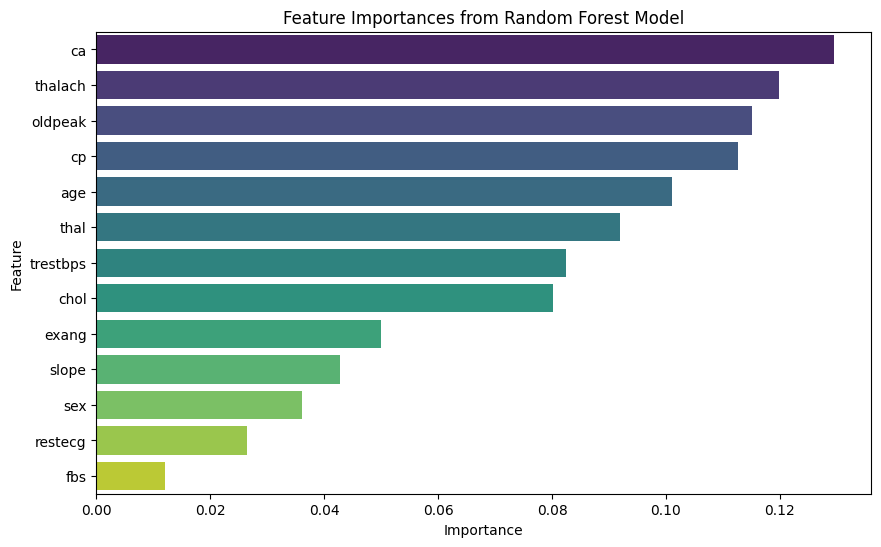

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest Model')
plt.show()

## Model Comparison

- Compare the performance on Test set for each model on Accuracy, Precision and Recall
- Use Visualization Techniques
- Draw ROC Curves for each of the three model
- What we learn from ROC Curves?
- Add more cells as required.

In [45]:
comparison = pd.DataFrame(results)
print(comparison)

                 Model  Test Accuracy  Test Precision  Test Recall  \
0  Logistic Regression       0.885246        0.882353     0.909091   
1       Neural Network       0.918033        0.937500     0.909091   
2        Random Forest       0.868852        0.878788     0.878788   

   Test F1 Score  
0       0.895522  
1       0.923077  
2       0.878788  


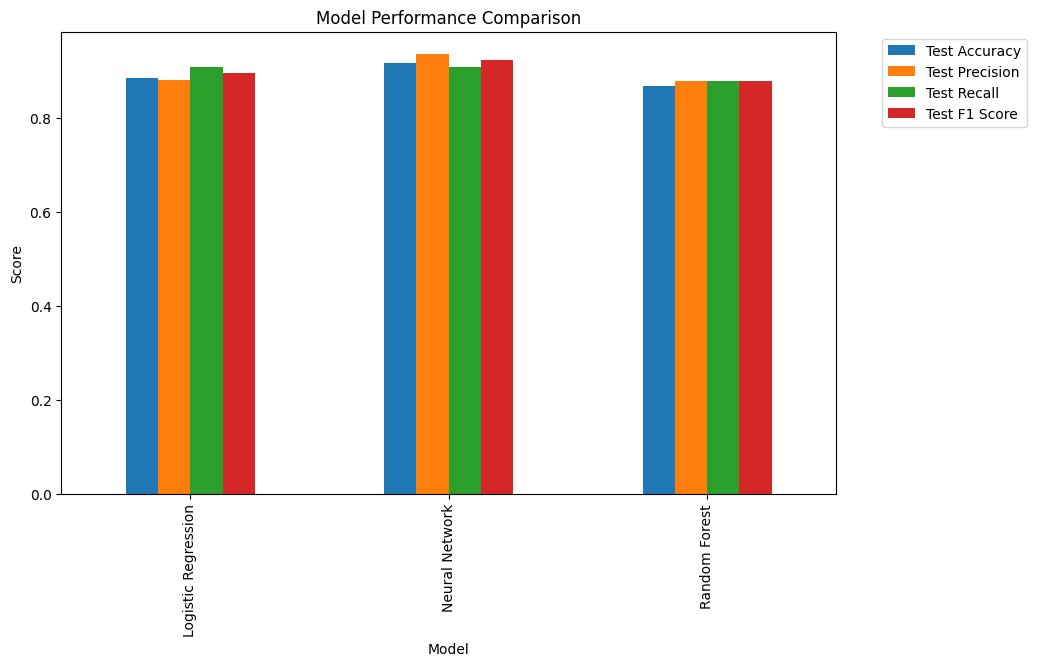

In [46]:
comparison.plot(x="Model" , kind= "bar" , figsize=(10,6) , title="Model Performance Comparison")
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [49]:
y_pred_prob_lr = log_reg_model.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_nn = nn_model.predict(X_test_scaled).ravel()
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [50]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_nn = auc(fpr_nn, tpr_nn)
auc_rf = auc(fpr_rf, tpr_rf)


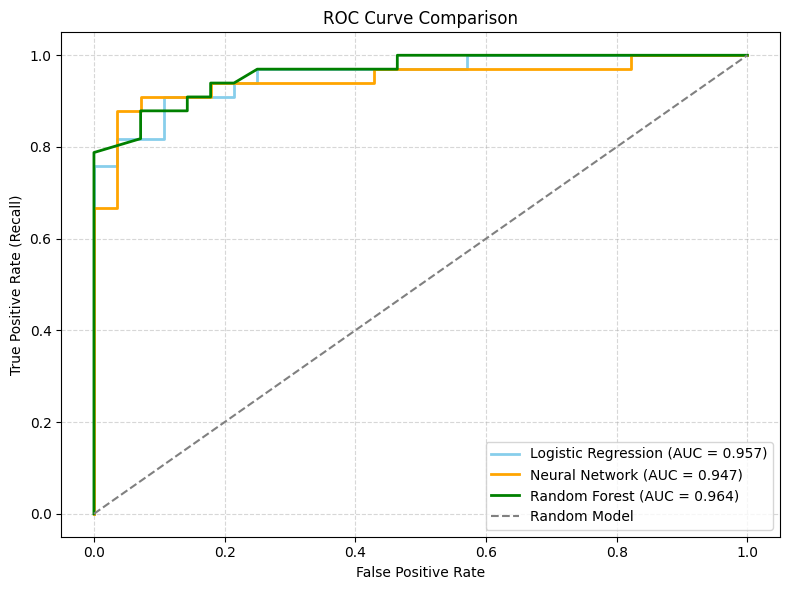

In [51]:
plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', color='skyblue', linewidth=2)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.3f})', color='orange', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='green', linewidth=2)

# Rastgele tahmin çizgisi (referans)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Model')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


## More........
1. Improve preprocessing steps (feature engineering, outlier detection, etc.) and observe any changes in the model performance.
2. Experiment with hyperparameter tuning for each model. Document your approach and results.
3. Record the training time for each model and compare them using bar chart.
4. Learn about k-fold cross validation and implement it.
5. What are the advantages of k-fold cross validation?
6. Discuss the strengths and weaknesses of each model based on your experiments.
7. Is more complex model always the best?
